**Maria Charisi** (AEM: 10727) and **Ioannis Michalainas** (AEM: 10902) 

# PART A

## A1

First, we begin by importing the necessary libriries. We use **numpy** for numeric operations and **matplotlib** for plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$D1$ stores the training samples for class $\omega_1$ (no stress), while $D2$ is the training set for class $\omega_2$ (stress).

In [2]:
D1 = np.array([ 2.8, -0.4, -0.8,  2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

We declare the PDF for $x$ given $\theta$ like so: 
$$  
p(x \mid \theta) = \frac{\pi}{1 + (x - \theta)^2} 
$$
(This is the **Cauchy distribution**)

In [3]:
def pdf(x, theta):
    return 1 / (np.pi*(1 + (x-theta)**2))

This function computes log-likelihood of $\theta$, given a dataset $D$ and a parameter :
$$
\log L(\theta \mid D) = \sum_{x \in D} \log p(x \mid \theta)
$$


In [4]:
def log_likelihood(D, theta):
    return np.sum(np.log(pdf(D, theta)))

### Maximizing Log-Likelihood

To determine the value of $\theta$ that maximizes the likelihood, $L(\theta \mid D)$, we focus on the log-likelihood function instead of the regular likelihood function. This is because the logarithm is a monotonically increasing function, meaning the maximum value remains at the same point, and working with logarithms simplifies the computation by converting products into sums.

#### Gradient Approach

In principle, the gradient of log-likelihood could be used to find its maximum. However, the gradient of this function does not have a closed-form expression, making it computationally challenging to apply this method directly.

#### $\theta$ Candidates

Instead, we take a simpler approach:
1. Define a range of candidate $\theta$ values that likely contains the true $\theta$.
2. Evaluate the log-likelihood function for these candidates and select the $\theta$ that maximizes it.

Since the data range spans approximately [-4.5, 4.1], we select a slightly wider candidate range for $\theta$, such as [-5, 5], to ensure it includes the optimal value.


In [5]:
candidates = np.linspace(-5, 5, 1000)

def fit(D, candidates):
    log_likelihood_D = [log_likelihood(D, theta) for theta in candidates]
    return candidates[np.argmax(log_likelihood_D)]

theta_hat_1 = fit(D1, candidates)
theta_hat_2 = fit(D2, candidates)

### Plots for $logP(D_1 \mid \theta)$ and $logP(D_2 \mid \theta)$
In the plots we showcase where our $\theta$ estimations lie (expectedly on the max value of the log-likelihood).

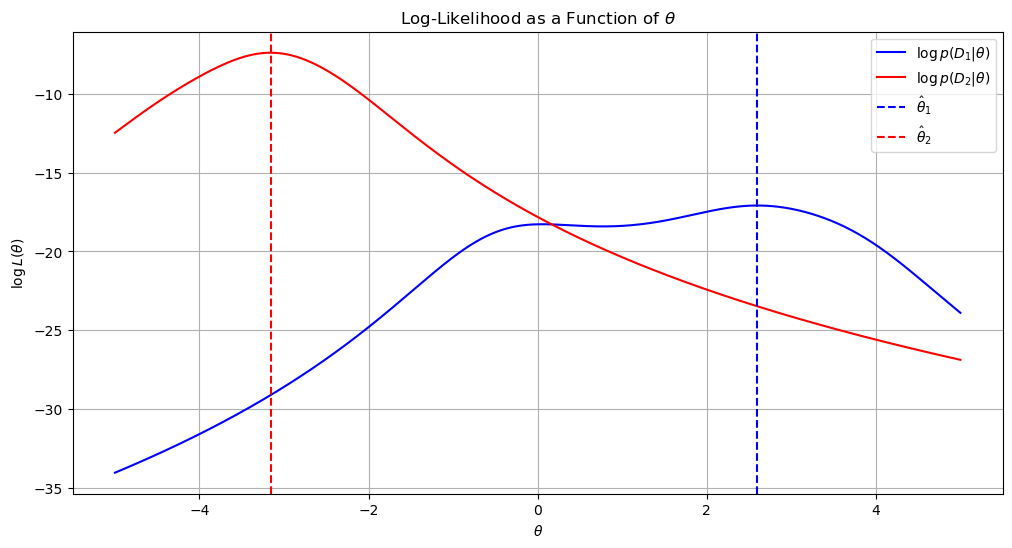

In [6]:
log_likelihood_D1 = [log_likelihood(D1, theta) for theta in candidates]
log_likelihood_D2 = [log_likelihood(D2, theta) for theta in candidates]

plt.figure(figsize=(12, 6))
plt.plot(candidates, log_likelihood_D1, label=r'$\log p(D_1|\theta)$', color='blue')
plt.plot(candidates, log_likelihood_D2, label=r'$\log p(D_2|\theta)$', color='red')
plt.axvline(theta_hat_1, color='blue', linestyle='--', label=r'$\hat{\theta}_1$')
plt.axvline(theta_hat_2, color='red', linestyle='--', label=r'$\hat{\theta}_2$')
plt.title("Log-Likelihood as a Function of $\\theta$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\log L(\theta)$")
plt.legend()
plt.grid()
plt.show()

## A2

We calculate the *a priori probabilities* for each cass $\omega_i$. Since we have a total of 12 samples, 7 classified in $\omega_1$ and 5 in $\omega_2$, those would be 7/12 and 5/12 respectivelly.

In [7]:
P1 = len(D1) / (len(D1)+len(D2))
P2 = len(D2) / (len(D1)+len(D2))

We then declare the discriminant function like so:
$$
g(x) = \log P(x \mid \hat{\theta}_1) - \log P(x \mid \hat{\theta}_2) + \log P(\omega_1) - \log P(\omega_2)
$$

In [8]:
def predict(x, theta1, theta2, P1, P2):
    return np.log(pdf(x, theta1)) - np.log(pdf(x, theta2)) + np.log(P1) - np.log(P2)

### Plot of g(x)

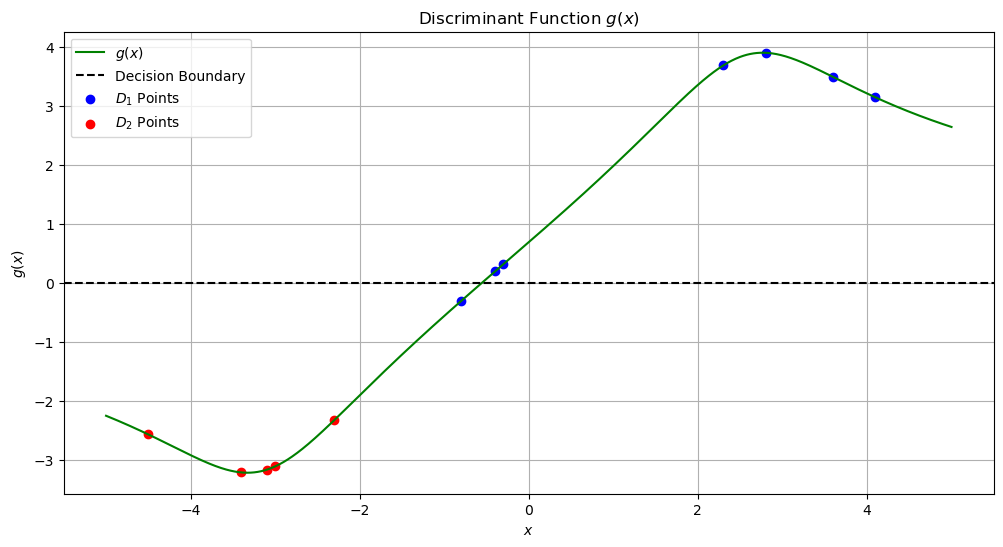

In [9]:
# range of x values for plotting g(x)
x_values = np.linspace(-5, 5, 1000)
g_values = predict(x_values, theta_hat_1, theta_hat_2, P1, P2)

plt.figure(figsize=(12, 6))
plt.plot(x_values, g_values, label=r"$g(x)$", color="green")
plt.axhline(0, color="black", linestyle="--", label="Decision Boundary")
plt.scatter(D1, predict(D1, theta_hat_1, theta_hat_2, P1, P2), color="blue", label=r"$D_1$ Points")
plt.scatter(D2, predict(D2, theta_hat_1, theta_hat_2, P1, P2), color="red", label=r"$D_2$ Points")
plt.title("Discriminant Function $g(x)$")
plt.xlabel("$x$")
plt.ylabel("$g(x)$")
plt.legend()
plt.grid()
plt.show()

#### Observations
- Most of the $D1$ points are classified correctly, as their $g(x) > 0$.
- All of the $D2$ points are classified correctly, as their $g(x) < 0$.

#### Decision Rule
The decision boundary is at $g(x) = 0$.
For any $x$:
- If $g(x) > 0$, classify $x$ as $ω1$ (no stress).
- If $g(x) < 0$, classify $x$ as $ω2$ (stress).

#### Summary
The classification rule leads to some misclassifications. While the decision rule works well for most of the data (11/12, 92%), there are always some trade-offs in classification accuracy. Achieving perfect classification is sometimes not feasible or desirable.

- Attempting to perfectly classify all points might lead to **overfitting**. A model that fits all training data perfectly may not generalize well to unseen data.
- The data may inherently contain some ambiguous or **overlapping cases** that no model can perfectly classify, especially if the two classes are not linearly separable.

# PART B

## B1

We declare the PDF of $\theta$ like so:
$$
p(\theta) = \frac{1}{10\pi \left( 1 + \left(\frac{\theta}{10}\right)^2 \right)} 
$$

In [10]:
def prior_theta(theta):
    return 1 / (10*np.pi * (1 + (theta/10)**2))

We declare a posteriori probability of $\theta$, $P(\theta \mid D)$ like so:
$$
p(\theta \mid D) = \frac{p(D \mid \theta) \cdot p(\theta)}{\int_{-\infty}^{\infty} p(D \mid \theta) \cdot p(\theta) \, d\theta}
$$

In [11]:
def posterior_theta(D, candidates):
    # exp neutrilizes log, so we get likelihood
    likelihood = np.array([np.exp(log_likelihood(D, theta)) for theta in candidates])
    unnormalized = likelihood*prior_theta(candidates)
    return unnormalized / np.trapezoid(unnormalized, candidates)

### Plots for $P(\theta \mid D_1)$ and $P(\theta \mid D_2)$
In Part A, the dataset values were relatively small ([-4.5, 4.1]). Using a range of [-5, 5] was a practical choice because it encompassed the likely $\theta$ values where the likelihood peaks.

In Part B, the prior distribution has a broader support ($(\theta / 10)$ in the denominator suggests a wider possible range). To ensure the posterior distribution adequately integrates both the likelihood and prior, we expanded the range to [-10, 10].



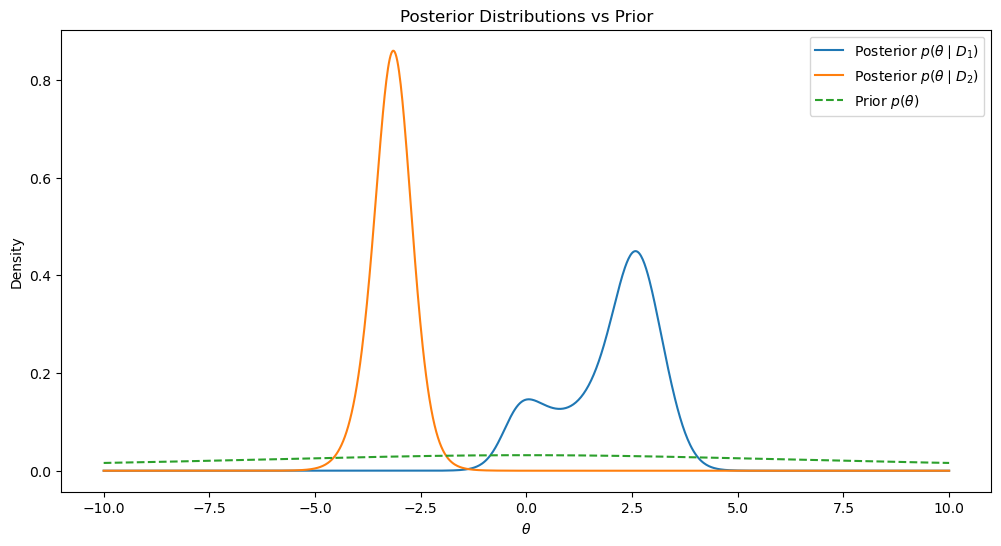

In [12]:
candidates = np.linspace(-10, 10, 1000)

posterior_D1 = posterior_theta(D1, candidates)
posterior_D2 = posterior_theta(D2, candidates)

plt.figure(figsize=(12, 6))
plt.plot(candidates, posterior_D1, label="Posterior $p(\\theta \\mid D_1)$")
plt.plot(candidates, posterior_D2, label="Posterior $p(\\theta \\mid D_2)$")
plt.plot(candidates, prior_theta(candidates), label="Prior $p(\\theta)$", linestyle="--")
plt.xlabel("$\\theta$")
plt.ylabel("Density")
plt.legend()
plt.title("Posterior Distributions vs Prior")
plt.show()

### Observations

- The prior distribution $p(\theta)$ is flat and spread out over the range of $\theta$ values. It shows minimal preference for any specific $\theta$, reflecting the prior belief before observing the data.
- The posteriors are much more concentrated than the prior, reflecting how the observed data updates the prior belief and provides more precise estimates of $p(\theta)$.
- The location of the peaks in the posteriors ($p(\theta \mid D_1)$ near 2 and $p(\theta \mid D_2)$ near -3) shows the influence of the datasets $D_1$ and $D_2$, respectively.

## B2

We declare posterior predictive distribution $p(x \mid D)$ like so:
$$
p(x \mid D) = \int p(x \mid \theta) p(\theta \mid D) d\theta
$$

In [13]:
def posterior_predictive(x, D, candidates):
    posterior = posterior_theta(D, candidates)
    integrand = [pdf(x, theta)*posterior[i] for i, theta in enumerate(candidates)]
    return np.trapezoid(integrand, candidates)

Then we declare the discriminant function $h(x)$:
$$
h(x) = \log P(x \mid D_1) - \log P(x \mid D_2) + \log P(\omega_1) - \log P(\omega_2)
$$

In [14]:
def predict(x, D1, D2, candidates, P1, P2):
    p_x_given_D1 = posterior_predictive(x, D1, candidates)
    p_x_given_D2 = posterior_predictive(x, D2, candidates)
    return np.log(p_x_given_D1) - np.log(p_x_given_D2) + np.log(P1) - np.log(P2)

### Plot of $h(x)$

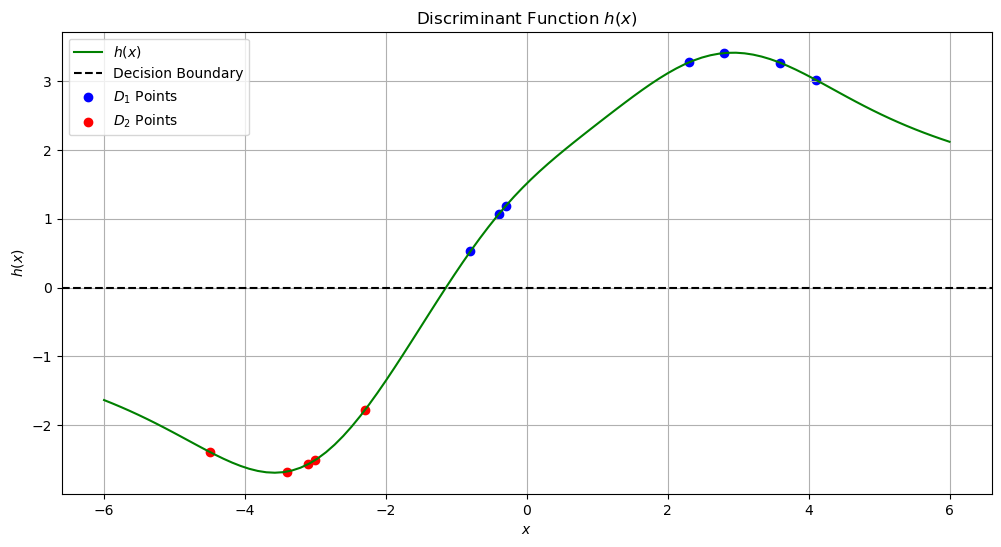

In [15]:
x_values = np.linspace(-6, 6, 100)
h_values = [predict(x, D1, D2, candidates, P1, P2) for x in x_values]
d1_values = [predict(x, D1, D2, candidates, P1, P2) for x in D1]
d2_values = [predict(x, D1, D2, candidates, P1, P2) for x in D2]

plt.figure(figsize=(12, 6))
plt.plot(x_values, h_values, label=r"$h(x)$", color="green")
plt.axhline(0, color="black", linestyle="--", label="Decision Boundary")
plt.scatter(D1, d1_values, color="blue", label=r"$D_1$ Points")
plt.scatter(D2, d2_values, color="red", label=r"$D_2$ Points")
plt.title("Discriminant Function $h(x)$")
plt.xlabel("$x$")
plt.ylabel("$h(x)$")
plt.legend()
plt.grid()
plt.show()

#### Observations
- All of the $D1$ points are classified correctly, as their $h(x) > 0$.
- All of the $D2$ points are classified correctly, as their $h(x) < 0$.

#### Decision Rule
The decision boundary is at $h(x) = 0$.
For any $x$:
- If $h(x) > 0$, classify $x$ as $ω1$ (no stress).
- If $h(x) < 0$, classify $x$ as $ω2$ (stress).

#### Maximum Likelihood Estimation vs Bayesian Estimation

In Part A, we used *Maximum Likelihood Estimation*. In Part B, we used *Bayesian Estimation*. Here are the key differences of the two approaches:
- Parameter Estimation:

**Part A**: Estimates a single value for $\theta$ ($\hat{\theta}_1$ and $\hat{\theta}_2$) that maximizes the likelihood for each class.

**Part B**: Considers the entire distribution of $\theta$ given the data (the posterior distribution) and integrates over this distribution to make predictions.

- Decision Boundary:

**Part A**: The decision boundary is determined by the log-likelihood and prior probabilities.

**Part B**: The decision boundary is determined by the posterior predictive distribution,  which integrates over all possible values of $\theta$ weighted by their posterior probabilities.

We observe that, for this specific training set, Bayesian approach classifies the data with 100% accuracy, as opposed to the Maximum Likelihood approach, where we had some error. We attribute this discrepency due to the fact that in part B we have prior knowlodge about the parameter $\theta$, in means of $p(\theta)$.

# PART C

## C1

### C1.1

First, we begin by importing the necessary libraries. The **sklearn.datasets** for loading the Iris dataset, **sklearn.tree** that implements the *Decision Tree Classifier*, **sklearn.model_selection** for splitting the dataset into train and test sets, **sklearn.metrics** to evaluate the accuracy of predictions and **matplotlib.colors** for better visualization of the plot.

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

We load the Iris dataset, isolating only the first two features at matrix **x** and their labels at vector **y**.

In [17]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

We now split the dataset into **train** and **test**. Each set contains 50% of the original dataset. We use a specific random state in order to ensure reproducibility. 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Our goal is to find the optimal depth with respect to *accuracy*. To do so, we iterate in a range of possible depths (1,10), where the optimal depth should lie. We chose this particular range to avoid **overfitting**. Deep descision trees generally lead to overfitting -they tend to capture overly specific patterns that do not generalize well. This is especially true in our case, where the dataset is relativelly small (150 samples). By narrowing the range to (1,10), we ensure that the optimal depth is included without calculating unnecessary depths.

In [19]:
best_depth = None
best_accuracy = 0
depth_accuracies = []

for depth in range(1, 10):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    depth_accuracies.append((depth, accuracy))
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

The following plot visualizes the optimal depth in terms of *accuracy* fot the **Decision Tree**.

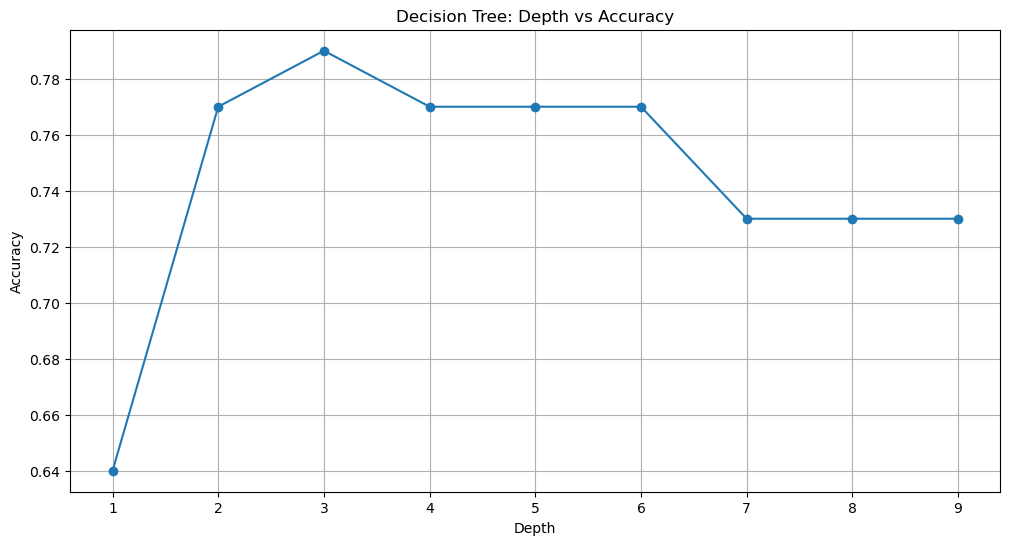

In [20]:
def plot_depth_vs_accuracy(depth_accuracies, title="Decision Tree Depth vs Accuracy"):
    depths, accuracies = zip(*depth_accuracies)
    accuracies = [round(acc, 2) for acc in accuracies]

    plt.figure(figsize=(12, 6))
    plt.plot(depths, accuracies, marker='o')
    plt.title(title)
    plt.xlabel("Depth")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

plot_depth_vs_accuracy(depth_accuracies, "Decision Tree: Depth vs Accuracy")

We create the **Decision Tree** that yields the best *accuracy*. As shown in the above plot, the optimal depth is **3** with accurracy **0.79**.

In [21]:
best_dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42);
best_dt.fit(X_train, y_train);

### C1.2

The following plot visualizes the decision boundaries for the **Decision Tree** with optimal depth (3). We only depict the samples from the test set.

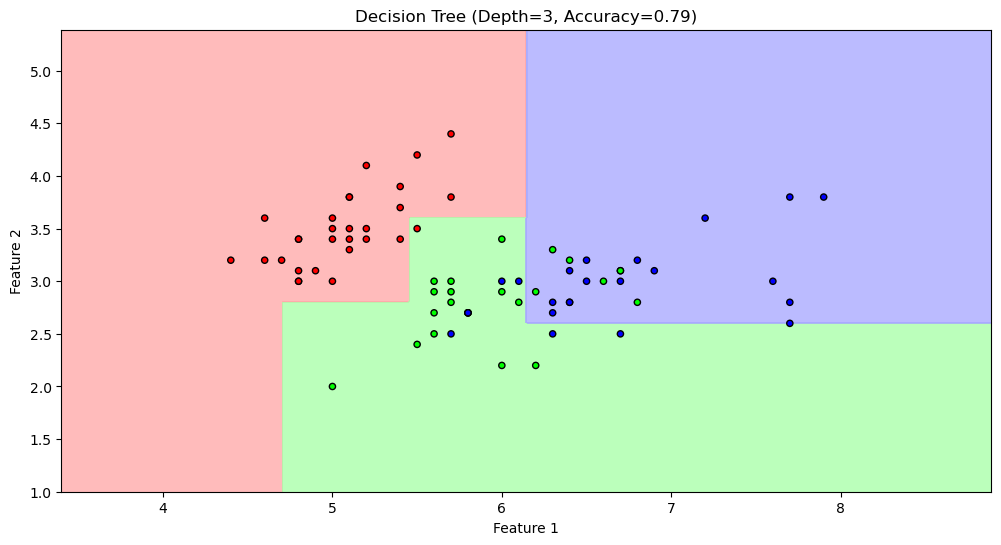

In [22]:
def plot_decision_boundaries(model, X, y, title):
    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
    cmap_bold  = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(12, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundaries(best_dt, X_test, y_test, f"Decision Tree (Depth={best_depth}, Accuracy={best_accuracy:.2f})")

## C2

### C2.1

We import **sklearn.ensemble** that implements the *Random Forest Classifier*.

In [23]:
from sklearn.ensemble import RandomForestClassifier

In this section, instead of one **Decision Tree** we will use a **Random Forest** of 100 Decision Trees. To train the Random Forest we will use the **Bootstrapping** technique. In essence, we will create 100 *new datasets* by simply drawing a percentage $\gamma$ of random points from the previous training set used, where $\gamma=0.5$. Our goal is yet again to find the optimal depth with respect to *accuracy*. To do so, we iterate in a range of possible depths (1,10), with the same logic as before. 

In [24]:
best_rf_depth = None
best_rf_accuracy = 0
rf_depth_accuracies = []

for depth in range(1, 10):
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42, bootstrap=True, max_samples=0.5)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    rf_depth_accuracies.append((depth, accuracy_rf))
    if accuracy_rf > best_rf_accuracy:
        best_rf_accuracy = accuracy_rf
        best_rf_depth = depth

The following plot visualizes the optimal depth in terms of *accuracy* for the **Random Forest**.

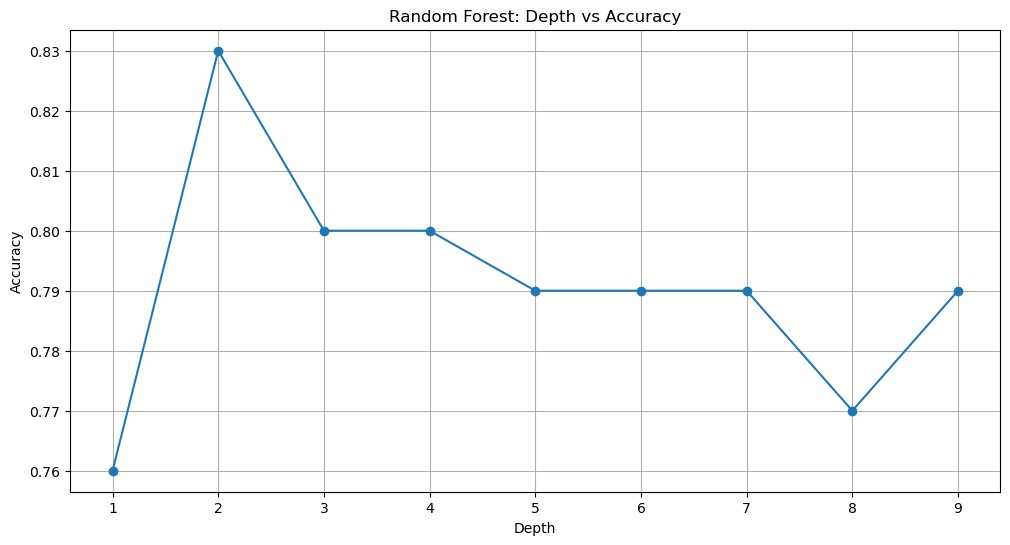

In [25]:
plot_depth_vs_accuracy(rf_depth_accuracies, "Random Forest: Depth vs Accuracy")

We create the **Random Forest** that yields the best *accuracy*. As shown in the above plot, the optimal depth is **2** with accurracy **0.83**.

In [26]:
best_rf = RandomForestClassifier(n_estimators=100, max_depth=best_rf_depth, random_state=42, bootstrap=True, max_samples=0.5);
best_rf.fit(X_train, y_train);

### C2.2

The following plot visualizes the decision boundaries for the **Random Forest** with optimal depth (2). We only depict the samples from the test set.

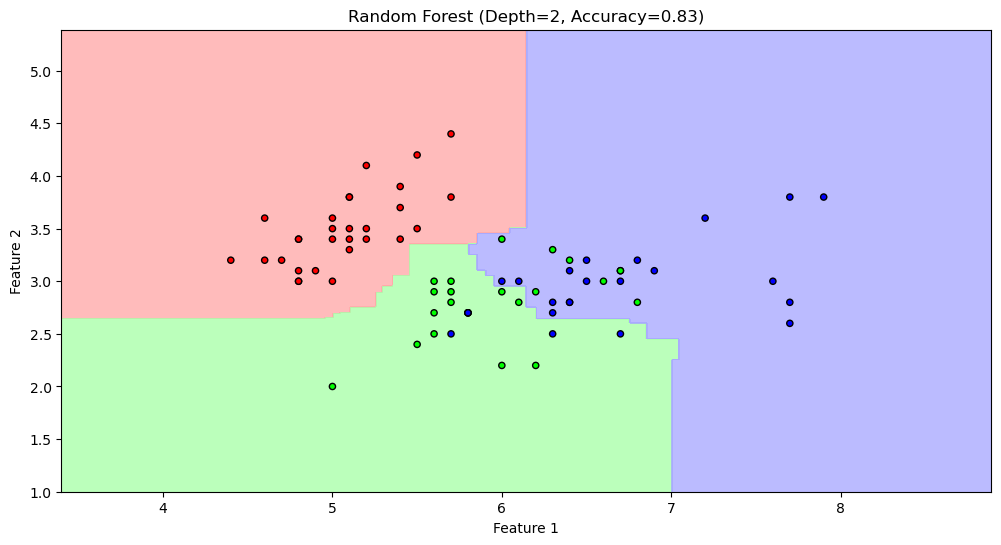

In [27]:
plot_decision_boundaries(best_rf, X_test, y_test, f"Random Forest (Depth={best_rf_depth}, Accuracy={best_rf_accuracy:.2f})")

### Observations

We notice we get slightly better results with the **Random Forest** than with the **Decision Tree** in terms of *accuracy*. This can be attributed to the fact that Decision Trees have rougher decision boundaries (hard splits) comprised mostly of rectanglar areas and tend to *overfit* to the training set. On the other hand, Random Forests have smoother decision boundaries, leading to better generalization. This happens because the Random Forest averages predictions across multiple Trees, it reduces the overfitting scene in a single Decision Tree.

### C2.3

In the section bellow we calculate the *accuracy* achieved for different values of $\gamma$ on its respective best depth. Essentially, we keep the *best* result we can get for each $\gamma$, as an example.

In [28]:
gamma_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

depths_accuracies = [] 
best_depth=None
best_accuracy = 0

for gamma in gamma_values:
    for depth in range(1, 10):
        rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42, bootstrap=True, max_samples=gamma)
        rf.fit(X_train, y_train) 
        y_pred_rf = rf.predict(X_test) 
        accuracy = accuracy_score(y_test, y_pred_rf)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth
    depths_accuracies.append((best_depth, best_accuracy))
    best_depth=None
    best_accuracy=0

gamma = 0.0
for depth, accuracy in depths_accuracies:
    gamma += 0.1
    print(f"Gamma: {gamma:.1f}, Best Depth: {depth}, Accuracy: {accuracy:.2f}")

Gamma: 0.1, Best Depth: 3, Accuracy: 0.81
Gamma: 0.2, Best Depth: 2, Accuracy: 0.80
Gamma: 0.3, Best Depth: 2, Accuracy: 0.81
Gamma: 0.4, Best Depth: 2, Accuracy: 0.83
Gamma: 0.5, Best Depth: 2, Accuracy: 0.83
Gamma: 0.6, Best Depth: 2, Accuracy: 0.83
Gamma: 0.7, Best Depth: 2, Accuracy: 0.83
Gamma: 0.8, Best Depth: 2, Accuracy: 0.83
Gamma: 0.9, Best Depth: 2, Accuracy: 0.83
Gamma: 1.0, Best Depth: 2, Accuracy: 0.83


### $\gamma$ Influence

- What we notice after the above analysis is that for lower values of $\gamma$ (0.1, 0.2, 0.3), the best accuracy varies between 0.80 and 0.81, with slight improvements as gamma increases. For higher values (0.4 and above), the accuracy stabilizes at around 0.83, indicating diminishing returns in performance improvement with increasing gamma. Generally, small $\gamma$ leads to **higher bias**, because each bootstrap sample contains less information about the entire dataset. On the other hand, for bigger values for $\gamma$ the diversity among bootstrap samples decreases, which can reduce the ensemble's effectiveness at reducing variance.

- We also notice that the best depth remains practically constant and equal to 2 for almost every $\gamma$.

In conclusion, increasing $\gamma$ up to 0.4 seems to benefit our algorithm, but further increasing it does not have any effect on *accuracy* or the best depth for the Random Forest.